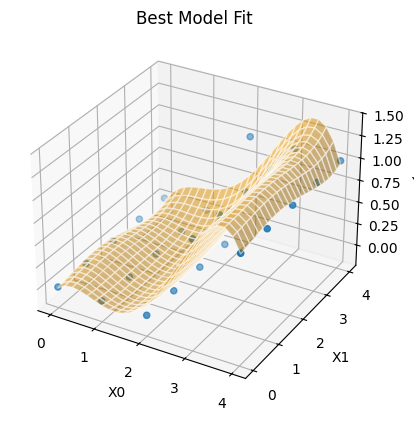

(4, None, np.float64(0.7698034224937244), 0.9279088258680096)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

# Параметри для генерації даних
a, b, c, d = 3, 0, 1, 2
np.random.seed(0)

# Генерація даних
x = np.array([[0, 1, 2, 3, 4] * 5, [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]])
y = a*x[0]**2 + b*x[1]**2 + c*x[0]*x[1] + d*x[0] + a*x[1] + b + np.random.normal(0, 1 + d, 25)
y = (y > y.mean()).astype(int)  


# Reshape data for model compatibility
x = x.T  # Transpose to shape (25, 2)
y = y

# Initialize storage for the best model
best_model = None
best_score = -np.inf
best_degree = None
best_mlp_architecture = None

# Step 1: Test Polynomial Regression models (degrees 1 to 4)
for degree in range(1, 5):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    avg_score = scores.mean()
    
    # Check if this model is better than the previous best
    if avg_score > best_score:
        best_score = avg_score
        best_model = model
        best_degree = degree
        best_mlp_architecture = None  # Resetting as this is polynomial

# Step 2: Test MLP models with 1-3 hidden layers with different sizes
for layers in [(10,), (10, 10), (10, 10, 10)]:
    model = MLPRegressor(hidden_layer_sizes=layers, solver='lbfgs', max_iter=10000, random_state=42)
    scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    avg_score = scores.mean()

    # Check if this MLP model is better than the previous best
    if avg_score > best_score:
        best_score = avg_score
        best_model = model
        best_mlp_architecture = layers
        best_degree = None  # Resetting as this is MLP

# Step 3: Fit the best model
best_model.fit(x, y)

# Step 4: Predict and calculate R² score for the best model
r2_score = best_model.score(x, y)
y_pred = best_model.predict(x)

# Step 5: Generate 3D plot to show the data and model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, label='Data Points')

# Prepare mesh grid for surface plot of predictions
x0_range = np.linspace(0, 4, 25)
x1_range = np.linspace(0, 4, 25)
x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
x_grid = np.c_[x0_grid.ravel(), x1_grid.ravel()]
y_grid_pred = best_model.predict(x_grid).reshape(x0_grid.shape)

# Plot the surface
ax.plot_surface(x0_grid, x1_grid, y_grid_pred, color='orange', alpha=0.5, edgecolor='w')
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("Y")
plt.title("Best Model Fit")

plt.show()

# Output the best model's details
best_degree, best_mlp_architecture, best_score, r2_score